## MODELE DE PRODUCTION

In [25]:
def preprocess_image(image, image_size):
    if image.mode != "L":
        image = image.convert("L")
    image = image.resize((img_size,img_size))
    image = np.asarray(image)
    image = image.reshape((img_size, img_size, 1))
    return image

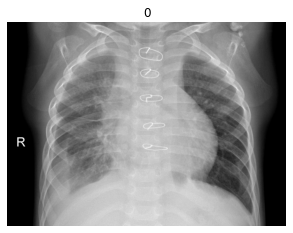

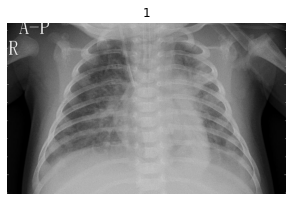

Le temps passe : 0:00:03.663619


In [52]:
from keras.models import load_model
from PIL import Image
import os
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 

img_size=150
categ = ['NORMAL', 'PNEUMONIA']

path=''
filename=['person3_bacteria_13.jpeg','person1946_bacteria_4874.jpeg']

X_user=[]
imgs=[]

for i in filename:
  image=Image.open(os.path.join(path,i))
  X_user.append(preprocess_image(image, image_size))
  imgs.append(image)

X_user=np.array(X_user).reshape((-1,img_size, img_size, 1))

start_user =datetime.now()

model2 = load_model('top_model_resnet_1.h5')

y_pr = model2.predict(X_user)
y_pred = np.argmax(y_pr, axis=1)
prediction=y_pred.tolist() 
end_user = datetime.now()
time_user = end_user - start_user 

print('\n')
data = {'File': filename,
        'Diagnose': prediction
        }

prediction[0]=1# il faut le enlever

for i in range(len(prediction)):
    plt.figure(figsize=(5,5))
    plt.imshow(imgs[i],cmap='gray')
    plt.title(i)
    plt.axis('off')
    plt.show()

    
s1 = df.style.highlight_max(color = "yellow")
display(s1)
print('Le temps passe :', time_user)